<center>
    <h1><b>Multi-logistic Regression</b></h1>
    <h3><b>Softmax</b></h3>
</center>

In [81]:
#Load libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

---

In [3]:
#Load datas
df = pd.read_csv('./data/petal dataset/IRIS.csv')

#View top 5 row of data
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Data Preprocessing 
data = df[['petal_length', 'petal_width', 'species']]
data.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [5]:
#Encoding ordinal categorical feature
unique_species = data['species'].unique()
encoding_species = {}
for i in range(len(unique_species)):
    encoding_species[unique_species[i]] = i

#replace value of categorical
data['species'] = data['species'].replace(encoding_species)

C:\Users\admin\AppData\Local\Temp\ipykernel_17348\1613559914.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = data['species'].replace(encoding_species)


In [6]:
#Convert data to numpy
data = data.to_numpy()
data[:5]

array([[1.4, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ]])

In [7]:
#Get num of samples
N = len(data)
N

150

In [8]:
#Shuffle data
np.random.shuffle(data)

#Get data train and test
train = data[:-30]
test = data[-30:]

#See data train and test
print('Train:\n', train[:5])
print('Test:\n', test[:5])

Train:
 [[6.1 1.9 2. ]
 [1.6 0.2 0. ]
 [4.  1.3 1. ]
 [4.4 1.3 1. ]
 [5.  1.7 1. ]]
Test:
 [[5.1 1.5 2. ]
 [3.3 1.  1. ]
 [4.4 1.4 1. ]
 [1.3 0.2 0. ]
 [4.7 1.4 1. ]]


In [9]:
#Get features and targets train
X_train = train[:,:-1]
y_train = train[:,-1]

In [10]:
#Get features and targets test
X_test = test[:,:-1]
y_test = test[:,-1]

In [11]:
#Function convert categorical from number to one-hot encoder
def one_hot_encoder(y):
    y = y.astype(np.int8)
    n_cate = np.unique(y)
    encode = np.zeros((len(y), len(n_cate)))
    for i in range(len(encode)):
        encode[i, y[i]] = 1
    return encode

---

### **Softmax Regression - Stochastic**

1. Pick a sample from traning data
2. Compute output $\hat{y}$
$$
z = \theta^Tx \\
\hat{y}_i = P_i = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$
3. Compute loss (cross-entropy)
$$
    L(\theta) = - \sum_i y_i\log(\hat{y}_i)
$$
4. Compute derivative
$$
    L'_{\theta} = x(\hat{y} - y)
$$
5. Update parameter
$$
    \theta = \theta - \eta L'_{\theta}
$$


In [221]:
class SoftmaxRegressionStochastic:
    
    def __init__(self, X, y, learning_rate, n_iter):
        self.X = X
        self.y = y
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.losses = []
        
    def softmax(self, z):
        '''
        This function used to compute
        softmax here is a activite function
        '''
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def fit(self):
        #get num of samples and features
        n_samples, n_features = self.X.shape
        
        #initeralize parameter
        w = np.random.randn(2, 3)
        b = np.zeros((1, 3))
        self.theta = np.r_[w, b]
        
        X = np.c_[self.X, np.ones(n_samples)]
        Y = one_hot_encoder(self.y)

        #Training data
        for _ in range(self.n_iter):
            for i in range(n_samples):
                #Get a sample from data
                x = X[i].reshape(-1, 1)
                y = Y[i].reshape(-1, 1)
                
                #Compute y_hat 
                z = self.theta.T.dot(x)
                y_hat = self.softmax(z)
                #Compute loss
                loss = - np.sum(y * (np.log(y_hat.T)))
                self.losses.append(np.mean(loss))
                
                #Compute derivative
                dL = x.dot((y_hat - y).T) 
                
                #update parameter
                self.theta = self.theta - self.learning_rate * dL
        
        return self.theta                

In [222]:
softmax = SoftmaxRegressionStochastic(X_train, y_train, 0.05, 50)
softmax.fit()

array([[-0.12377526,  1.3694695 ,  1.6335878 ],
       [-3.76962956, -1.40980431,  4.42202001],
       [ 7.07442242,  0.80322695, -7.87764937]])

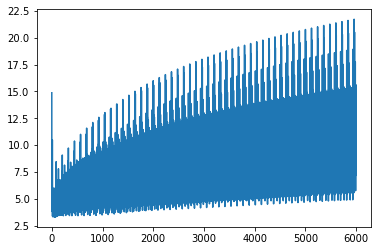

In [223]:
plt.plot(softmax.losses)